Classify the email using the binary classification method. Email Spam detection has two 
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and 
Support Vector Machine for classification. Analyze their performance. 
Dataset link: The emails.csv dataset on the Kaggle 
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Load the dataset
df = pd.read_csv("emails.csv")  # Change path if needed
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [132]:
#Data preprocessing
print(df.tail())
print(df.size)
print(df.shape)

       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
5167           0  
5168           0  
5169           1  
5170           1  
5171     

In [133]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [134]:
df = df.drop('Email No.', axis=1)

In [135]:
df.shape

(5172, 3001)

In [136]:
df.describe() 

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [138]:
df['Prediction'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64>

In [139]:
X=df.drop(['Prediction'],axis=1)
Y=df['Prediction']

In [140]:
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [141]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [175]:
from sklearn.preprocessing import scale
X = scale(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [189]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
print("Prediction", y_pred)

Prediction [0 0 1 ... 0 1 0]


In [191]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

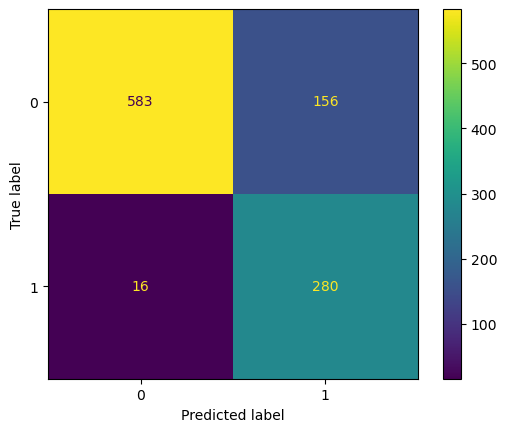

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay

mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       739
           1       0.64      0.95      0.77       296

    accuracy                           0.83      1035
   macro avg       0.81      0.87      0.82      1035
weighted avg       0.88      0.83      0.84      1035



In [199]:
print("accuracy_score: ")
print(accuracy_score(y_test, y_pred))
print("precision_score: ")
print(precision_score(y_test, y_pred))
print("recall_score:-")
print(recall_score(y_test,y_pred))
print("Error rate:-")
print(1-accuracy_score(y_test,y_pred))

accuracy_score: 
0.8338164251207729
precision_score: 
0.6422018348623854
recall_score:-
0.9459459459459459
Error rate:-
0.16618357487922708


In [201]:
from sklearn.svm import SVC
model = SVC(C = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [203]:
metrics.confusion_matrix(y_test, y_pred)

array([[738,   1],
       [ 54, 242]], dtype=int64)

In [209]:
print("SVM accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("SVM precision score: ", metrics.precision_score(y_test, y_pred))
print("SVM recall score: ", metrics.recall_score(y_test, y_pred))
print("SVM F1 score: ", metrics.f1_score(y_test, y_pred))


SVM accuracy:  0.9468599033816425
SVM precision score:  0.9958847736625515
SVM recall score:  0.8175675675675675
SVM F1 score:  0.8979591836734694
